### --- Day 6: Probably a Fire Hazard ---
Because your neighbors keep defeating you in the holiday house decorating contest year after year, you've decided to deploy one million lights in a 1000x1000 grid.

Furthermore, because you've been especially nice this year, Santa has mailed you instructions on how to display the ideal lighting configuration.

Lights in your grid are numbered from 0 to 999 in each direction; the lights at each corner are at `0,0`, `0,999`, `999,999`, and `999,0`. The instructions include whether to turn on, turn off, or toggle various inclusive ranges given as coordinate pairs. Each coordinate pair represents opposite corners of a rectangle, inclusive; a coordinate pair like `0,0 through 2,2` therefore refers to 9 lights in a 3x3 square. The lights all start turned off.

To defeat your neighbors this year, all you have to do is set up your lights by doing the instructions Santa sent you in order.

For example:

`turn on 0,0 through 999,999` would turn on (or leave on) every light.
`toggle 0,0 through 999,0` would toggle the first line of 1000 lights, turning off the ones that were on, and turning on the ones that were off.
`turn off 499,499 through 500,500` would turn off (or leave off) the middle four lights.

After following the instructions, how many lights are lit?

In [14]:
sample_input = """turn on 0,0 through 999,999
toggle 0,0 through 999,0
turn off 499,499 through 500,500"""

from enum import Enum


class Instruction(Enum):
    TURN_ON = 0
    TOGGLE = 1
    TURN_OFF = 2


def parse_string(string: str) -> tuple[Instruction, tuple[int, int], tuple[int, int]]:
    words = string.split()
    if words[0] == "turn":
        if words[1] == "on":
            instruction = Instruction.TURN_ON
        elif words[1] == "off":
            instruction = Instruction.TURN_OFF
    elif words[0] == "toggle":
        instruction = Instruction.TOGGLE
    else:
        raise ValueError(f"Unknown instruction: {words[0]}")
    start = tuple(int(x) for x in words[-3].split(","))
    end = tuple(int(x) for x in words[-1].split(","))
    return (instruction, start, end)


def execute_instruction(
    instruction: Instruction,
    start: tuple[int, int],
    end: tuple[int, int],
    grid: list[list[bool]],
) -> None:
    for x in range(start[0], end[0] + 1):
        for y in range(start[1], end[1] + 1):
            if instruction == Instruction.TURN_ON:
                grid[x][y] = True
            elif instruction == Instruction.TOGGLE:
                grid[x][y] = not grid[x][y]
            elif instruction == Instruction.TURN_OFF:
                grid[x][y] = False


instructions = [
    parse_string(line) for line in sample_input.splitlines()
]  # test, should be 1000000
grid = [[False for _ in range(1000)] for _ in range(1000)]
for instruction in instructions:
    execute_instruction(*instruction, grid)
    break

print(f"Expected 1 000 000: got {sum(sum(row) for row in grid)}")

with open("data/day06.txt") as f:
    instructions = [parse_string(line) for line in f.readlines()]

grid = [[False for _ in range(1000)] for _ in range(1000)]
for instruction in instructions:
    execute_instruction(*instruction, grid)

print(f"Part 1: {sum(sum(row) for row in grid)}")

Expected 1 000 000: got 1000000
Part 1: 377891


### --- Part Two ---
You just finish implementing your winning light pattern when you realize you mistranslated Santa's message from Ancient Nordic Elvish.

The light grid you bought actually has individual brightness controls; each light can have a brightness of zero or more. The lights all start at zero.

The phrase `turn on` actually means that you should increase the brightness of those lights by `1`.

The phrase` turn off` actually means that you should decrease the brightness of those lights by `1`, to a minimum of zero.

The phrase `toggle` actually means that you should increase the brightness of those lights by `2`.

What is the total brightness of all lights combined after following Santa's instructions?

For example:

- `turn on 0,0 through 0,0` would increase the total brightness by `1`.
- `toggle 0,0 through 999,999` would increase the total brightness by `2000000`.

In [15]:
def execute_instruction_2(
    instruction: Instruction,
    start: tuple[int, int],
    end: tuple[int, int],
    grid: list[list[int]],
) -> None:
    for x in range(start[0], end[0] + 1):
        for y in range(start[1], end[1] + 1):
            if instruction == Instruction.TURN_ON:
                grid[x][y] += 1
            elif instruction == Instruction.TOGGLE:
                grid[x][y] += 2
            elif instruction == Instruction.TURN_OFF:
                if grid[x][y] > 0:
                    grid[x][y] -= 1


grid = [[0 for _ in range(1000)] for _ in range(1000)]
for instruction in instructions:
    execute_instruction_2(*instruction, grid)

print(f"Part 2: {sum(sum(row) for row in grid)}")

Part 2: 14110788


MovieWriter imagemagick unavailable; using Pillow instead.


Saving animation...
0/300
0/300
50/300
100/300
150/300
200/300
250/300
0/300


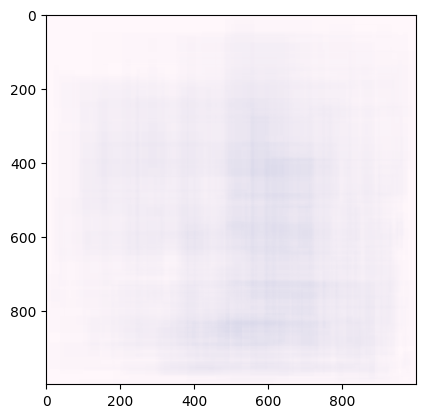

In [20]:
# Let's visualize those lights ;)
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

with open("data/day06.txt") as f:
    instructions = [parse_string(line) for line in f.readlines()]


# Function to update the plot for each frame
def update(frame, instructions, grid):
    if frame % 50 == 0:
        print(f"{frame}/{len(instructions)}")
    ax.clear()
    ax.imshow(grid, cmap="PuBu", interpolation="bilinear", vmin=0, vmax=200)

    if frame < len(instructions):
        execute_instruction_2(*instructions[frame], grid)


# Initialize a random grid (replace this with your grid)
grid = [[0 for _ in range(1000)] for _ in range(1000)]
# Create the figure and axis
fig, ax = plt.subplots()

# Set the animation function and number of frames
animation = FuncAnimation(
    fig,
    update,
    frames=len(instructions),
    fargs=(instructions, grid),
    interval=1,
    repeat=False,
)
print("Saving animation...")
animation.save("viz/day06.gif", dpi=400, writer="imagemagick", fps=60)